In [14]:
import pandas as pd
import numpy as np
from numpy.random import standard_t
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.spatial.distance import euclidean
from sklearn.metrics import mean_squared_error



# A

In [15]:
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
images = lfw.images
X = lfw.data

n_samples, h, w = images.shape
print("Images shape:", images.shape)
print("Data matrix:", X.shape)


Images shape: (1560, 50, 37)
Data matrix: (1560, 1850)


# B

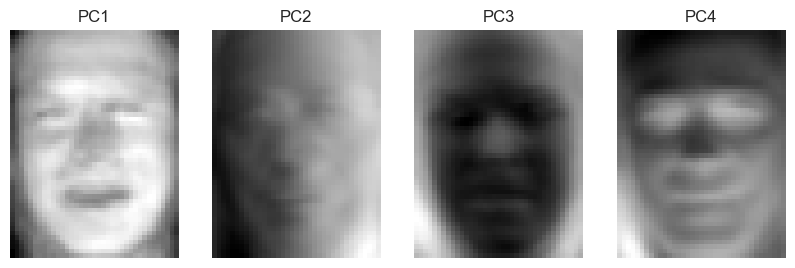

In [16]:

n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
X_pca = pca.fit_transform(X)

eigenfaces = pca.components_.reshape((n_components, h, w))

fig, axes = plt.subplots(1, 4, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"PC{i+1}")
    ax.axis('off')
plt.show()


# G

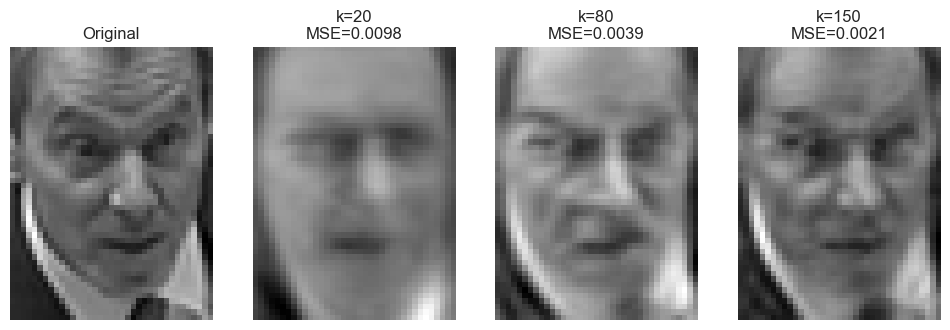

In [17]:

k_values = [20, 80, 150]
idx = 0
original = X[idx]

fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(12, 4))
axes[0].imshow(original.reshape(h, w), cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

for i, k in enumerate(k_values):
    pca_k = PCA(n_components=k, svd_solver='randomized', whiten=True)
    X_pca_k = pca_k.fit_transform(X)
    X_rec = pca_k.inverse_transform(X_pca_k)

    rec = X_rec[idx].reshape(h, w)
    mse = mean_squared_error(original, X_rec[idx])

    axes[i+1].imshow(rec, cmap='gray')
    axes[i+1].set_title(f"k={k}\nMSE={mse:.4f}")
    axes[i+1].axis('off')

plt.show()

# D

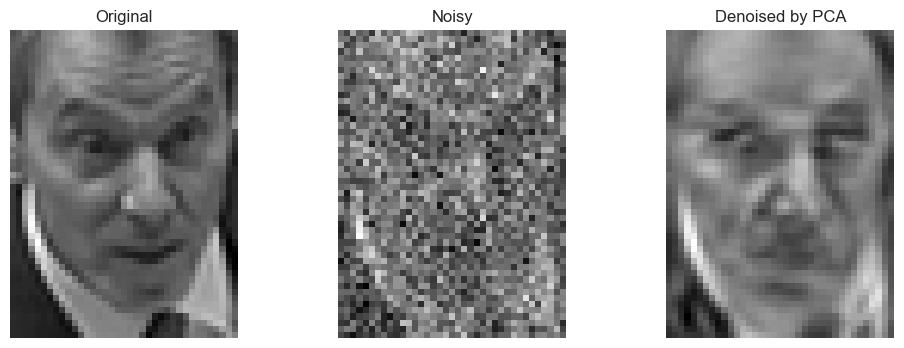

In [18]:

noise_std = 0.20
noisy = original + noise_std * np.random.randn(original.size)
noisy_img = noisy.reshape(h, w)

X_noisy = X.copy()
X_noisy[idx] = noisy

X_pca_noisy = pca.transform(X_noisy)
X_denoised = pca.inverse_transform(X_pca_noisy)
denoised_img = X_denoised[idx].reshape(h, w)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(original.reshape(h, w), cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(noisy_img, cmap='gray')
axes[1].set_title("Noisy")
axes[1].axis('off')

axes[2].imshow(denoised_img, cmap='gray')
axes[2].set_title("Denoised by PCA")
axes[2].axis('off')

plt.show()

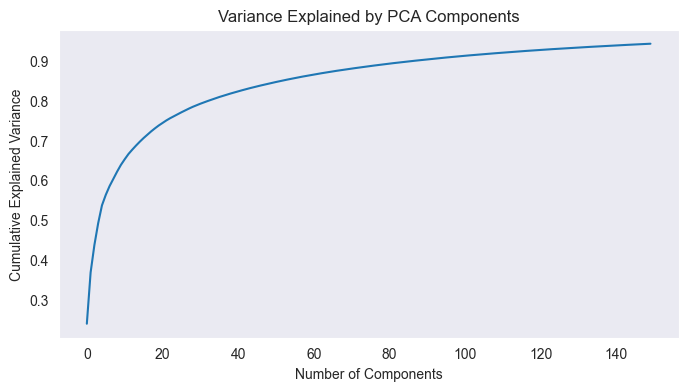

In [19]:

plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.grid()
plt.show()

In [20]:
# fig, axes = plt.subplots(3, 4, figsize=(12, 9))
# for i, ax in enumerate(axes.flatten()):
#     ax.imshow(lfw_data[i].reshape(h, w), cmap="gray")
#     ax.set_title(f"Original Image {i + 1}")
#     ax.axis("off")
# fig.suptitle("12 Original Images from LFW Dataset", fontsize=14, y=1.02)
# plt.tight_layout()
# plt.show()
#
# fig, axes = plt.subplots(3, 4, figsize=(12, 9))
# for i, ax in enumerate(axes.flatten()):
#     eigenface_raw = pca.components_[i].reshape(h, w)
#     ax.imshow(eigenface_raw, cmap="gray")
#     ax.set_title(f"Eigenface {i + 1}\n(var: {pca.explained_variance_ratio_[i]:.4f})")
#     ax.axis("off")
# fig.suptitle("Eigenfaces (Without Inverse Transform)", fontsize=14, y=1.02)
# plt.tight_layout()
# plt.show()
#
# fig, axes = plt.subplots(3, 4, figsize=(12, 9))
# for i, ax in enumerate(axes.flatten()):
#     eigenface = scaler.inverse_transform(pca.components_[i].reshape(1, -1)).reshape(h, w)
#     ax.imshow(eigenface, cmap="gray")
#     ax.set_title(f"Eigenface {i + 1}\n(var: {pca.explained_variance_ratio_[i]:.4f})")
#     ax.axis("off")
# fig.suptitle("Eigenfaces (With Inverse Transform - Correct)", fontsize=14, y=1.02)
# plt.tight_layout()
# plt.show()

In [21]:
# # ============================================================================
# # بررسی مقیاس داده‌ها و MSE
# # ============================================================================
#
# print("بررسی مقیاس داده‌ها:")
# print(f"حداقل مقدار در original_image: {np.min(original_image):.4f}")
# print(f"حداکثر مقدار در original_image: {np.max(original_image):.4f}")
# print(f"میانگین مقادیر در original_image: {np.mean(original_image):.4f}")
#
# # محاسبه حداکثر MSE ممکن
# max_possible_mse = np.max((np.max(original_image) - np.min(original_image))**2)
# print(f"\nحداکثر MSE ممکن: {max_possible_mse:.4f}")
#
# # محاسبه MSE بین original و یک تصویر کاملاً تصادفی (برای مقایسه)
# random_noise = np.random.randn(*original_image.shape) * 50 + np.mean(original_image)
# mse_random = np.mean((original_image - random_noise) ** 2)
# print(f"MSE بین original و نویز تصادفی: {mse_random:.4f}")
#
# # اگر داده‌ها نرمال‌شده باشند (0-1)
# if np.max(original_image) <= 1.0:
#     print("\n⚠️  داده‌ها نرمال‌شده‌اند (0-1)")
#     print("مقادیر MSE شما منطقی هستند:")
#     print(f"- MSE نویزی: {296.82:.2f} نسبتاً بزرگ است")
#     print(f"- MSE بازساخته: {82.49:.2f} بهبود خوبی نشان می‌دهد")
#
#     # محاسبه PSNR برای ارزیابی بهتر
#     def calculate_psnr(mse, max_val=1.0):
#         if mse == 0:
#             return float('inf')
#         return 20 * np.log10(max_val / np.sqrt(mse))
#
#     psnr_noisy = calculate_psnr(296.82)
#     psnr_recon = calculate_psnr(82.49)
#     print(f"\nPSNR نویزی: {psnr_noisy:.2f} dB")
#     print(f"PSNR بازساخته: {psnr_recon:.2f} dB")
#     print(f"بهبود PSNR: {psnr_recon - psnr_noisy:.2f} dB")
#
# else:
#     print("\n⚠️  داده‌ها احتمالاً در مقیاس اصلی هستند (0-255)")
#     print("مقادیر MSE شما بسیار کوچک هستند!")
#     print("ممکن است در محاسبه اشتباه کرده باشید یا داده‌ها قبلاً نرمال‌شده باشند.")
#
# # ============================================================================
# # کد صحیح برای بخش دال
# # ============================================================================
#
# print("\n" + "="*60)
# print("کد صحیح برای بخش دال: افزودن نویز گوسی و بازسازی")
# print("="*60)
#
# # 1. ایجاد تصویر نویزی
# noise_level = 0.2  # سطح نویز
# noisy_image = original_image + noise_level * np.random.randn(*original_image.shape)
#
# # 2. استانداردسازی تصویر نویزی (همانند داده‌های آموزشی)
# noisy_scaled = scaler.transform(noisy_image.reshape(1, -1))
#
# # 3. تبدیل به فضای PCA
# noisy_pca = pca.transform(noisy_scaled)
#
# # 4. بازسازی با k=80 کامپوننت اول
# # (فرض: PCA اصلی با 1850 کامپوننت ساخته شده)
# pca_full = PCA(n_components=1850)
# X_pca_full = pca_full.fit_transform(x_scaled)
#
# # برای k=80
# k = 80
# noisy_pca_k = np.zeros((1, 1850))
# noisy_pca_k[0, :k] = noisy_pca[0, :k]  # فقط k کامپوننت اول
# reconstructed_noisy = pca_full.inverse_transform(noisy_pca_k)
#
# # برگشت به مقیاس اصلی
# reconstructed_noisy_original = scaler.inverse_transform(reconstructed_noisy)
#
# # 5. محاسبه MSE
# mse_noisy = np.mean((original_image - noisy_image) ** 2)
# mse_reconstructed = np.mean((original_image - reconstructed_noisy_original.flatten()) ** 2)
#
# print(f"\nنتایج:")
# print(f"1. MSE بین تصویر اصلی و نویزی: {mse_noisy:.2f}")
# print(f"2. MSE بین تصویر اصلی و بازساخته (k={k}): {mse_reconstructed:.2f}")
# print(f"3. کاهش خطا: {((mse_noisy - mse_reconstructed) / mse_noisy * 100):.1f}%")
#
# # نمایش تصاویر
# fig, axes = plt.subplots(1, 3, figsize=(12, 4))
#
# # تصویر اصلی
# axes[0].imshow(original_image.reshape(h, w), cmap='gray')
# axes[0].set_title('تصویر اصلی')
# axes[0].axis('off')
#
# # تصویر نویزی
# axes[1].imshow(noisy_image.reshape(h, w), cmap='gray')
# axes[1].set_title(f'تصویر نویزی\nMSE = {mse_noisy:.2f}')
# axes[1].axis('off')
#
# # تصویر بازساخته
# axes[2].imshow(reconstructed_noisy_original.reshape(h, w), cmap='gray')
# axes[2].set_title(f'بازساخته با k={k}\nMSE = {mse_reconstructed:.2f}')
# axes[2].axis('off')
#
# plt.suptitle('حذف نویز با PCA', fontsize=14, fontweight='bold')
# plt.tight_layout()
# plt.show()